In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

from sklearn.datasets import make_regression
from matplotlib import pyplot
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
tf.random.set_seed(0)

float_formatter = "{:.4f}".format
np.set_printoptions(formatter={'float_kind':float_formatter})

print(tf.__version__)

2.4.1


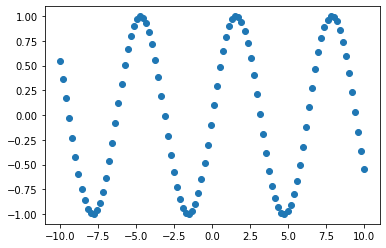

In [4]:
def gen_sin(b,e,n):
    x = np.linspace(b, e, n)
    y = np.sin(x)
    return x, y

x,y = gen_sin(-10,10,100)
pyplot.scatter(x,y)
pyplot.show()



In [5]:
def plot_X1_Model(_x, _y):
  plt.scatter(test_features, test_labels, label='Data')
  plt.plot(_x, _y, color='k', label='Predictions')
  plt.xlabel('X')
  plt.ylabel('Y')
  plt.legend()

def plot_loss(history, ylim=[0, 100]):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim(ylim)
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)  

## Create simple dataset

In [20]:
train_features, train_labels = gen_sin(-10,10,1000)

test_features, test_labels = gen_sin(-20,20,200)

test_s_features, test_s_labels = gen_sin(-5,5,20)

display(train_features[:10])
display(test_features[:10])
display(test_s_features[:10])

array([-10.0000, -9.9800, -9.9600, -9.9399, -9.9199, -9.8999, -9.8799,
       -9.8599, -9.8398, -9.8198])

array([-20.0000, -19.7990, -19.5980, -19.3970, -19.1960, -18.9950,
       -18.7940, -18.5930, -18.3920, -18.1910])

array([-5.0000, -4.4737, -3.9474, -3.4211, -2.8947, -2.3684, -1.8421,
       -1.3158, -0.7895, -0.2632])

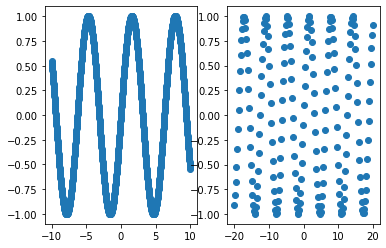

In [7]:
pyplot.subplot(1, 2, 1)
pyplot.scatter(train_features,train_labels)
pyplot.subplot(1, 2, 2)
pyplot.scatter(test_features,test_labels)
pyplot.show()

In [8]:
def get_sequence(sequence, n_steps):
        X, y = list(), list()
        for i in range(len(sequence)):
                end_ix = i + n_steps
                if end_ix > len(sequence)-1:
                        break
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
        return np.array(X), np.array(y)


## Normilize data

In [9]:
layer_normalizer = preprocessing.Normalization(input_shape=[1,])
layer_normalizer.adapt(train_features)

display(layer_normalizer(train_features)[:5])
display(layer_normalizer(test_features)[:5])

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[-1.7303],
       [-1.7269],
       [-1.7234],
       [-1.7199],
       [-1.7165]], dtype=float32)>

<tf.Tensor: shape=(5, 1), dtype=float32, numpy=
array([[-3.4606],
       [-3.4259],
       [-3.3911],
       [-3.3563],
       [-3.3215]], dtype=float32)>

## Create Network

In [10]:
#model 
X1_model = tf.keras.Sequential([
    layer_normalizer,
    layers.Dense(units=32, activation='relu'),
    layers.Dense(units=10, activation='relu'),
    layers.Dense(units=5, activation='sigmoid'),

    layers.Dense(units=1)
])

display(X1_model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 1)                 3         
_________________________________________________________________
dense (Dense)                (None, 32)                64        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 6         
Total params: 458
Trainable params: 455
Non-trainable params: 3
_________________________________________________________________


None

In [11]:
# test prediction shape
display(X1_model.predict(train_features[:2]))

array([[-0.5629],
       [-0.5628]], dtype=float32)

In [12]:
#compile model 
X1_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    loss='mse')

In [13]:
len(train_features)

1000

In [14]:
%%time
#train model X1
history_X1 = X1_model.fit(
    train_features, train_labels,
    epochs=500,
    # suppress logging
    verbose=0,
    # Calculate validation results on 20% of the training data
    validation_split = 0.2)

CPU times: user 42.5 s, sys: 3.04 s, total: 45.5 s
Wall time: 33 s


In [15]:
hist_X1 = pd.DataFrame(history_X1.history)
hist_X1['epoch'] = history_X1.epoch
display(hist_X1.tail(2))

,loss,val_loss,epoch
498,0.005688,1.869728,498
499,0.005856,1.824934,499


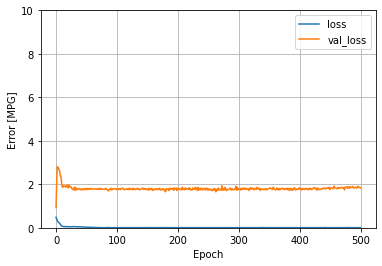

In [16]:
plot_loss(history_X1, [0,10])

In [17]:
test_results = {}

test_results['X1_trains'] = X1_model.evaluate(
    train_features,
    train_labels, verbose=0)

test_results['X1_test'] = X1_model.evaluate(
    test_features,
    test_labels, verbose=0)

test_results['X1_s_trains'] = X1_model.evaluate(
    test_s_features,
    test_s_labels, verbose=0)    

display(test_results)    

{'X1_trains': 0.36933279037475586,
 'X1_test': 0.960415244102478,
 'X1_s_trains': 0.002940964186564088}

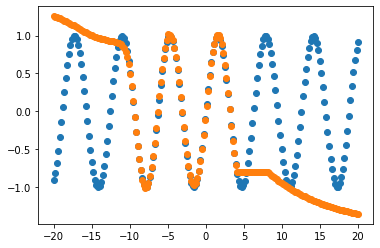

In [18]:
#pyplot.scatter(train_features,train_labels)
#pyplot.scatter(train_features,X1_model.predict(train_features))
pyplot.scatter(test_features,test_labels)
pyplot.scatter(test_features,X1_model.predict(test_features))
#pyplot.xlim([200,250])
#pyplot.ylim([200,250])
pyplot.show()

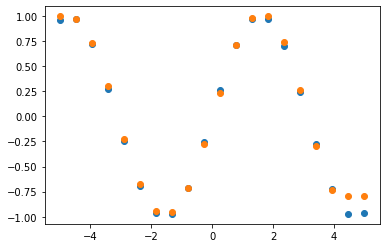

In [21]:
pyplot.scatter(test_s_features,test_s_labels)
pyplot.scatter(test_s_features,X1_model.predict(test_s_features))